In [12]:
from QuantLib import *

In [13]:
%%capture 
%pylab inline --no-import-all
import matplotlib.pyplot as plot

In [14]:
today=Date_todaysDate()

In [16]:
Settings.instance().evaluationDate=today

In [19]:
data=[(2,0.02), (3, 0.03) ,(5,0.05), (10,0.06), (15,0.07), (20 ,0.075), (30,0.08)]

In [30]:
calendar=TARGET()
settle = calendar.advance(today, 3, Days)
quotes=[]
helpers=[]
for len, c in data:
    maturity=calendar.advance(settle,len,Years)
    quote=SimpleQuote(100.0)
    quotes.append(quote)
    schedule=Schedule(settle,maturity, Period(Annual),calendar,
                     ModifiedFollowing, ModifiedFollowing,
                     DateGeneration.Backward, False)
    helpers.append(FixedRateBondHelper(QuoteHandle(quote),3,100.0,
                                       schedule,[c],SimpleDayCounter(),
                                      ModifiedFollowing))

In [34]:
curve=FittedBondDiscountCurve(0,calendar,helpers,SimpleDayCounter(),
                            NelsonSiegelFitting())

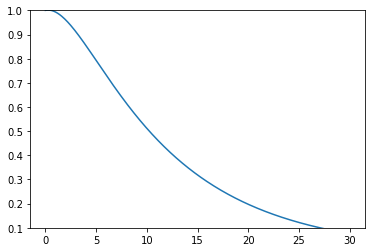

In [42]:
sample_times=numpy.linspace(0,30,301)
sample_discounts=[curve.discount(t) for t in sample_times]
f, ax = plot.subplots()
ax.set_ylim(0.1,1.0)
_=ax.plot(sample_times, sample_discounts)

In [47]:
schedule=Schedule(today,calendar.advance(today,15,Years),
                  Period(Semiannual),calendar,
                     ModifiedFollowing, ModifiedFollowing,
                     DateGeneration.Backward, False)
bond=FixedRateBond(3,100.0, schedule,[0.04],Actual360())

In [50]:
bond.setPricingEngine(DiscountingBondEngine(YieldTermStructureHandle(curve)))
print(bond.NPV())

71.3014608681334


In [57]:
prices=[]
def print_npv():
    p=bond.NPV()
    prices.append(p)
    print(p)

In [58]:
obsvr=Observer(print_npv) # def observer bond and its market price
obsvr.registerWith(bond)

In [81]:
quotes[2].setValue(101.0); quotes[2].setValue(100.0)

In [80]:
prices=[]
for q in quotes:
    q.setValue(101.0)

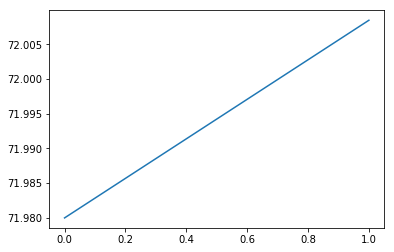

In [76]:
_=plt.plot(prices,'-')

In [79]:
bond.freeze(); bond.unfreeze()  # stop notification

In [ ]:
del obsvr